<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-proditorIF/blob/main/Sep29-30/30_09_2023_McLe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy.linalg import linalg
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
file ="/content/drive/MyDrive/Machine_Learn/olympic100m_men.txt"
data=np.loadtxt(file,delimiter=",").T
#Asigamos los datos
x=data[0]
y=data[1]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:

w =[27,-1.5]

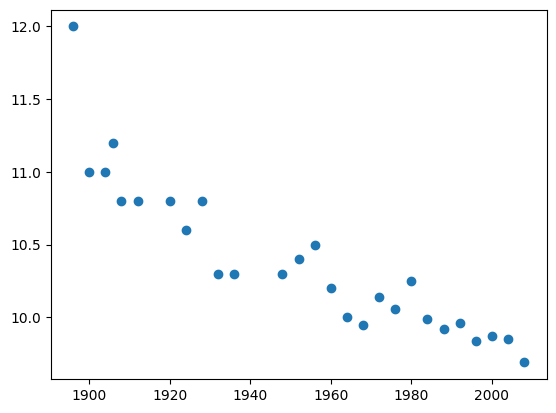

In [ ]:
plt.plot(x,y,'o')

In [48]:
'''
def gaus(wa,s):
  wp =[ np.random.normal(wa[0], s, 50), np.random.normal(wa[1], s, 50)]
  return wp
  '''
def modelL(w,x):
  T = w[0]+w[1]*x
  return T
def inlike(mod,t,w,x):
  InL = np.sum((y-modelL(w,x))**2)
  return InL
def inPost(mod,t,p,x):
  InP = inlike(mod,t,w,x)+np.log(p)
  return InP
def prior(w,intw1,intw0):
  if intw0[0]<w[0]< intw0[1] &  intw1[0]<w[1]< intw1[1]:
    return 1
  else :
    return 0

sig = 0.657
w0_interval =[20,40]
w1_interval =[-2,0]
Wprop = w + np.random.normal(0, sig, 2)
m =modelL(w,x)
pr = prior(Wprop,w1_interval,w0_interval)
in_post =inPost(m,y,pr,x)
print(in_post)


-inf


<ipython-input-48-0d652832b7c1>:13: RuntimeWarning: divide by zero encountered in log
  InP = inlike(mod,t,w,x)+np.log(p)


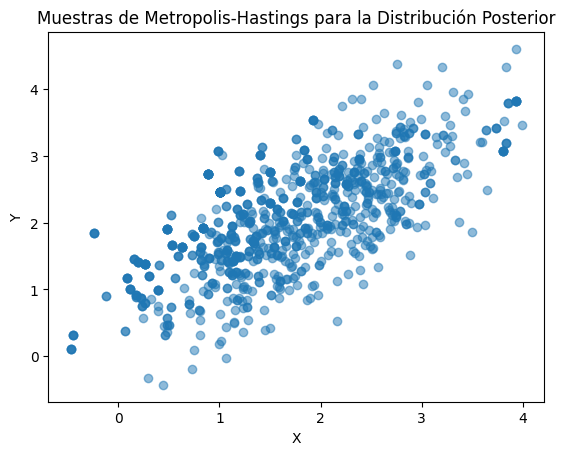

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Define la función de la distribución posterior
def posterior_distribution(x, y):
    # Aquí debes implementar tu propia función de la distribución posterior.
    # Puede ser el producto de una verosimilitud y una distribución previa.
    # Asumamos una distribución gaussiana simple para este ejemplo:
    mu_x = 2.0
    mu_y = 3.0
    sigma_x = 1.0
    sigma_y = 1.0
    likelihood_x = np.exp(-(x - mu_x)**2 / (2 * sigma_x**2))
    likelihood_y = np.exp(-(y - mu_y)**2 / (2 * sigma_y**2))
    prior_x = 1.0  # Distribución previa constante
    prior_y = 1.0  # Distribución previa constante
    return likelihood_x * likelihood_y * prior_x * prior_y

# Inicializa valores iniciales
x_current, y_current = np.random.rand(2)

# Define el tamaño de los pasos (sigma)
sigma = 0.5

# Realiza el bucle de MCMC
num_iterations = 1000
samples = []

for _ in range(num_iterations):
    # Propuesta de nuevos valores
    x_proposal, y_proposal = x_current + np.random.normal(0, sigma, 2)

    # Calcular la razón de aceptación
    acceptance_ratio = (
        posterior_distribution(x_proposal, y_proposal) /
        posterior_distribution(x_current, y_current)
    )

    # Aceptar o rechazar la propuesta
    if np.random.rand() < acceptance_ratio:
        x_current, y_current = x_proposal, y_proposal

    # Guardar el valor actual como muestra
    samples.append((x_current, y_current))

# Visualizar los resultados
samples = np.array(samples)
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Muestras de Metropolis-Hastings para la Distribución Posterior')
plt.show()
